<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [8]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [70]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv('df_cleaned.csv')

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,7.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,7.0
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,7.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,7.0


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [72]:
##Write your code here
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['Industry'])


In [73]:
df_copy['Industry'].isnull().value_counts() 

Industry
False    28858
Name: count, dtype: int64

In [74]:
df_bar = df_copy['Industry'].value_counts() 

<Axes: xlabel='Industry'>

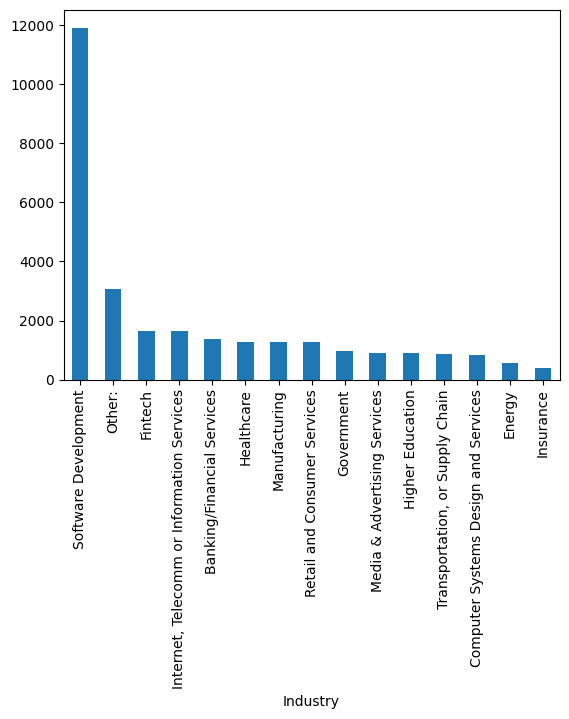

In [75]:
df_bar.plot(kind = 'bar') 

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [84]:
##Write your code here
df['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [85]:
df_copy_dropped = df_copy.dropna(subset=['ConvertedCompYearly'])
df_copy_dropped

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,65.0,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10.0
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,...,0.0,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10.0
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Apples,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,...,20.0,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10.0
392,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media,NaN,...,30.0,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7.0
398,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Other (please specify):,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.0,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41178,41179,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Apples,Hobby,"Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,NaN,...,80.0,80.0,30.0,0.0,0.0,0.0,Too long,Neither easy nor difficult,9711.0,0.0
41180,41181,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Written Tutorials;Stac...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,44640.0,7.0
41184,41185,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Freel...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books,...,20.0,10.0,20.0,15.0,0.0,0.0,Appropriate in length,Easy,170000.0,9.0
41186,41187,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,20.0,25.0,15.0,5.0,5.0,0.0,Appropriate in length,Easy,12000.0,3.0


In [86]:
df_copy_dropped['ConvertedCompYearly'].isnull().value_counts() 

ConvertedCompYearly
False    15976
Name: count, dtype: int64

In [87]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [88]:
df_copy_dropped['Z-score'] = zscore(df_copy_dropped['ConvertedCompYearly'])
print(df_copy_dropped['Z-score'])

72      -0.455673
379      0.030755
389      0.139107
392      0.434787
398      0.631483
           ...   
41178   -0.441834
41180   -0.239502
41184    0.486666
41186   -0.428574
41187    0.792716
Name: Z-score, Length: 15976, dtype: float64


/tmp/ipykernel_4096/862923589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_dropped['Z-score'] = zscore(df_copy_dropped['ConvertedCompYearly'])


In [89]:
outliers = df_copy_dropped[df_copy_dropped['Z-score'].abs() > 3]
print(outliers)

       ResponseId                                         MainBranch  \
529           530                     I am a developer by profession   
828           829                     I am a developer by profession   
1932         1933                     I am a developer by profession   
2171         2172                     I am a developer by profession   
2177         2178                     I am a developer by profession   
...           ...                                                ...   
37518       37519                     I am a developer by profession   
37930       37931                     I am a developer by profession   
38219       38220  I am not primarily a developer, but I write co...   
40066       40067                     I am a developer by profession   
41027       41028                     I am a developer by profession   

                   Age                                         Employment  \
529    25-34 years old                                Empl

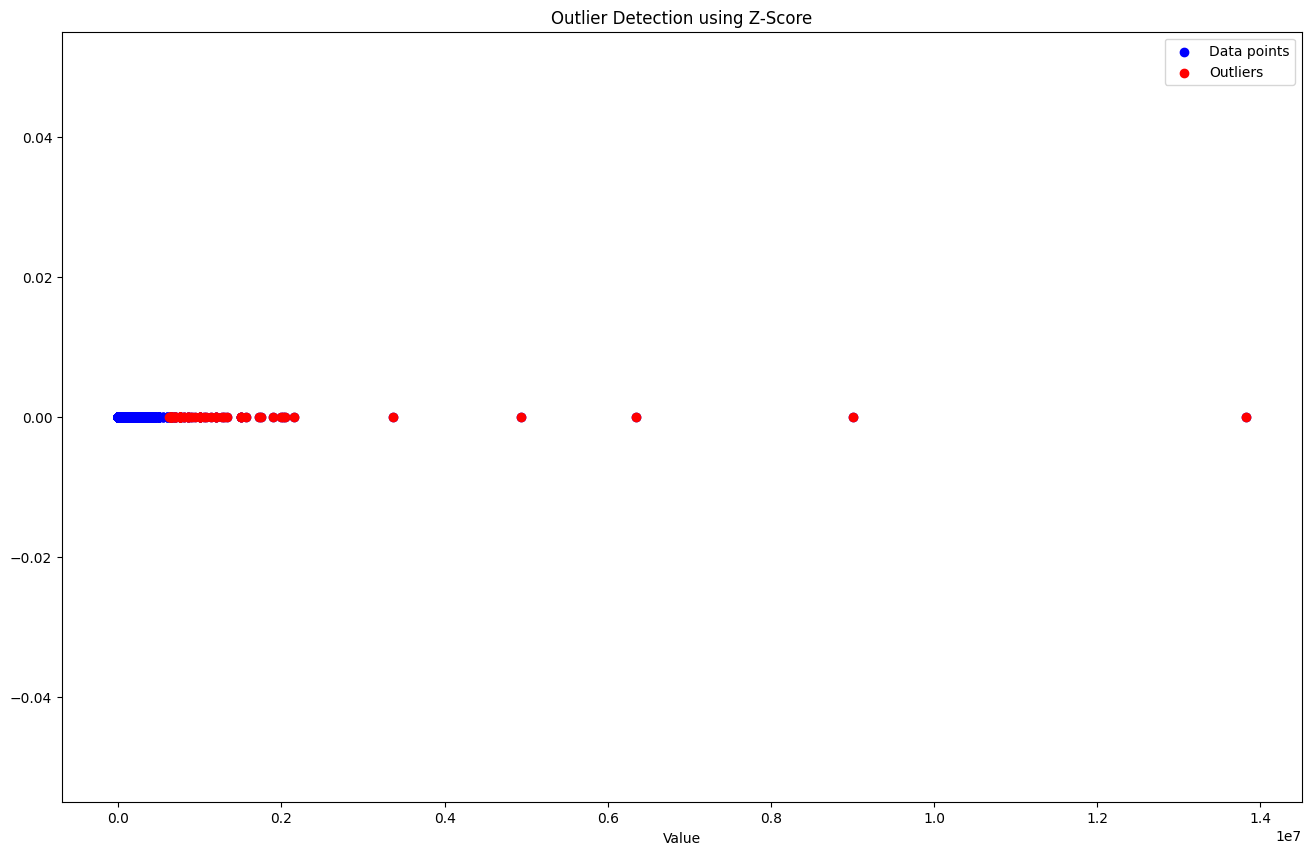

In [90]:
plt.figure(figsize=(16,10))
plt.scatter(df_copy_dropped['ConvertedCompYearly'], np.zeros_like(df_copy_dropped['ConvertedCompYearly']), color='blue', label='Data points')
plt.scatter(outliers['ConvertedCompYearly'], np.zeros_like(outliers['ConvertedCompYearly']), color='red', label='Outliers')
plt.title('Outlier Detection using Z-Score')
plt.xlabel('Value')
plt.legend()
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [91]:
##Write your code here
from scipy import stats
iqr = stats.iqr(df_copy_dropped['ConvertedCompYearly'])
print(iqr) 

74667.0


In [92]:
q1 = np.percentile(df_copy_dropped['ConvertedCompYearly'], 25)
q3 = np.percentile(df_copy_dropped['ConvertedCompYearly'], 75)
q3

np.float64(108280.0)

In [93]:
q1

np.float64(33613.0)

In [106]:
pd.set_option('display.max_columns', None)

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [107]:
##Write your code here
mask = df_copy_dropped['ConvertedCompYearly'].sub(df_copy_dropped['ConvertedCompYearly'].mean()).div(df_copy_dropped['ConvertedCompYearly'].std()).abs().le(3)

df_copy_dropped_new = df_copy_dropped[mask]
df_copy_dropped_new 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Z-score
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,3,1,Data scientist or machine learning specialist,100 to 499 employees,I have some influence,Start a free trial;Ask developers I know/work ...,Is ready-to-go but also customizable for growt...,APIs;Customization;Integrated developer commun...,Pakistan,PKR\tPakistani rupee,2040000.0,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,C#;Rust;Scala,NaN,MongoDB;MySQL;SQLite,BigQuery;Cassandra;Databricks SQL;Elasticsearc...,NaN,Microsoft Azure;VMware,Amazon Web Services (AWS);Databricks;Google Cloud,NaN,Angular;AngularJS;Express;FastAPI;Flask;jQuery...,Django,NaN,CMake,NaN,NaN,Apache Kafka;Apache Spark;CUDA;Hadoop;Hugging ...,CUDA;mlflow;TensorFlow;Torch/PyTorch,CUDA;TensorFlow;Torch/PyTorch,Docker;Homebrew;Pip,Docker,Docker,IntelliJ IDEA;IPython;Jupyter Notebook/Jupyter...,NaN,NaN,MacOS;Windows,NaN,GitHub Discussions;Markdown File,NaN,NaN,Discord;Google Meet;Slack;Whatsapp;Zoom,NaN,NaN,ChatGPT;GitHub Copilot;Google Gemini;Visual St...,Meta AI,NaN,Stack Overflow;Stack Exchange,A few times per week,Yes,Less than once per month or monthly,Quickly finding code solutions;Finding reliabl...,"Yes, somewhat",Yes,Very favorable,Increase productivity;Greater efficiency;Impro...,Somewhat trust,"Good, but not great at handling complex tasks",Learning about a codebase;Writing code;Documen...,Project planning;Testing code;Committing and r...,NaN,Learning about a codebase;Writing code;Documen...,NaN,NaN,NaN,NaN,No,Circulating misinformation or disinformation;M...,"AI tools lack context of codebase, internal a...",Yes,People manager,3.0,Strongly agree,Strongly disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,1-2 times a week,6-10 times a week,Never,30-60 minutes a day,60-120 minutes a day,Amount of technical 

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [95]:
df_copy_dropped_new['Age'].unique()

array(['18-24 years old', '35-44 years old', '25-34 years old',
       '45-54 years old', '55-64 years old', '65 years or older',
       'Under 18 years old', 'Prefer not to say'], dtype=object)

In [102]:
df_age_copy = df_copy_dropped_new.copy()

In [103]:
age_map = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    'Prefer not to say': 35,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}


In [104]:
##Write your code here
df_age_copy['Age'] = df_age_copy['Age'].map(age_map)
df_age_copy['Age']

72       21
379      40
389      30
392      40
398      50
         ..
41178    21
41180    30
41184    50
41186    21
41187    60
Name: Age, Length: 15913, dtype: int64

In [105]:
#Age vs ConvertedCompYearly
correlation_matrix = np.corrcoef(df_age_copy['Age'], df_age_copy['ConvertedCompYearly'])
print(correlation_matrix)

[[1.         0.34341955]
 [0.34341955 1.        ]]


In [112]:
df_age_copy['YearsCodePro'].replace(np.nan, 'Less than 1 year', inplace = True)
df_age_copy['YearsCodePro'].replace('Less than 1 year', 1, inplace = True)
df_age_copy['YearsCodePro'].replace('More than 50 years', 51, inplace = True)

/tmp/ipykernel_4096/3461651399.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_age_copy['YearsCodePro'].replace(np.nan, 'Less than 1 year', inplace = True)
/tmp/ipykernel_4096/3461651399.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [115]:
df_age_copy['YearsCode'].replace(np.nan, 'Less than 1 year', inplace = True)
df_age_copy['YearsCode'].replace('Less than 1 year', 1, inplace = True)
df_age_copy['YearsCode'].replace('More than 50 years', 51, inplace = True)

In [116]:
df_age_copy['YearsCode'] = df_age_copy['YearsCode'].astype(int)

In [117]:
#Age vs Years Code
correlation_matrix = np.corrcoef(df_age_copy['Age'], df_age_copy['YearsCode'])
print(correlation_matrix)

[[1.       0.783809]
 [0.783809 1.      ]]


In [119]:
##Age vs Years Code Pro
correlation_matrix = np.corrcoef(df_age_copy['Age'], df_age_copy['YearsCodePro'])
print(correlation_matrix)

[[1.         0.81659043]
 [0.81659043 1.        ]]


<Axes: xlabel='Age', ylabel='ConvertedCompYearly'>

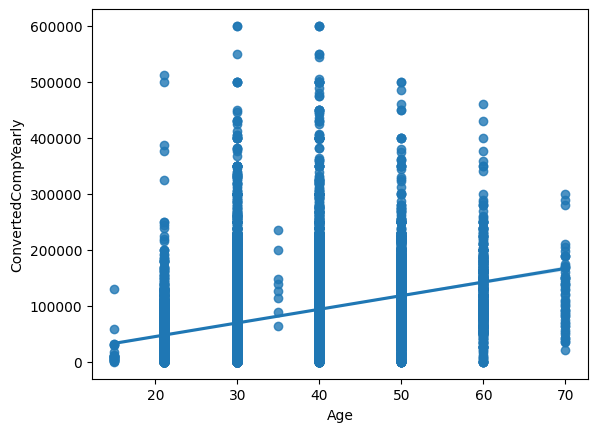

In [121]:
sns.regplot(data = df_age_copy, x='Age', y= 'ConvertedCompYearly')

<Axes: xlabel='Age', ylabel='YearsCodePro'>

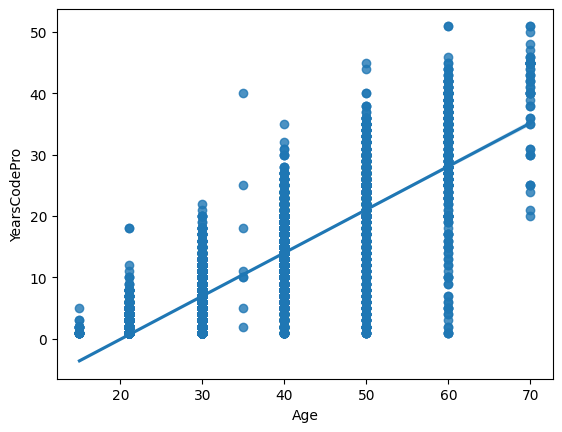

In [122]:
sns.regplot(data = df_age_copy, x='Age', y= 'YearsCodePro')

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
